In [124]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,classification_report, PrecisionRecallDisplay, brier_score_loss
from sklearn.metrics import roc_curve, auc
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,MinMaxScaler
from sklearn.feature_selection import SelectFromModel, RFE,RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import shap
from xgboost import XGBClassifier
import seaborn as sn
import numpy as np
import pandas as pd

**Load Dataset**

In [83]:
train = pd.read_csv('/content/cs-training.csv',index_col=0)
test = pd.read_csv('/content/cs-test.csv',index_col=0)

**Explore the data**

In [90]:
#Train Dataset
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [68]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [91]:
#Test set
test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

In [72]:
test.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


**Clean the data & Create feature and target set**

In [75]:
train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [79]:
train=train.dropna()
train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [94]:
#df train dataset with 10 features
df_train=train.drop('SeriousDlqin2yrs', axis=1)
df_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149996,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [95]:
# Train result 
df_train_target = train[['SeriousDlqin2yrs']]
df_train_target

,SeriousDlqin2yrs
1,1
2,0
3,0
4,0
5,0
...,...
149996,0
149997,0
149998,0
149999,0


In [96]:
# df Test dataset
df_test=test.drop('SeriousDlqin2yrs', axis=1)
df_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


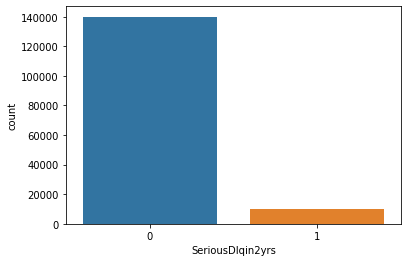

In [115]:
# Count of Unique Target value
sn.countplot(x ='SeriousDlqin2yrs', data = df_train_target)

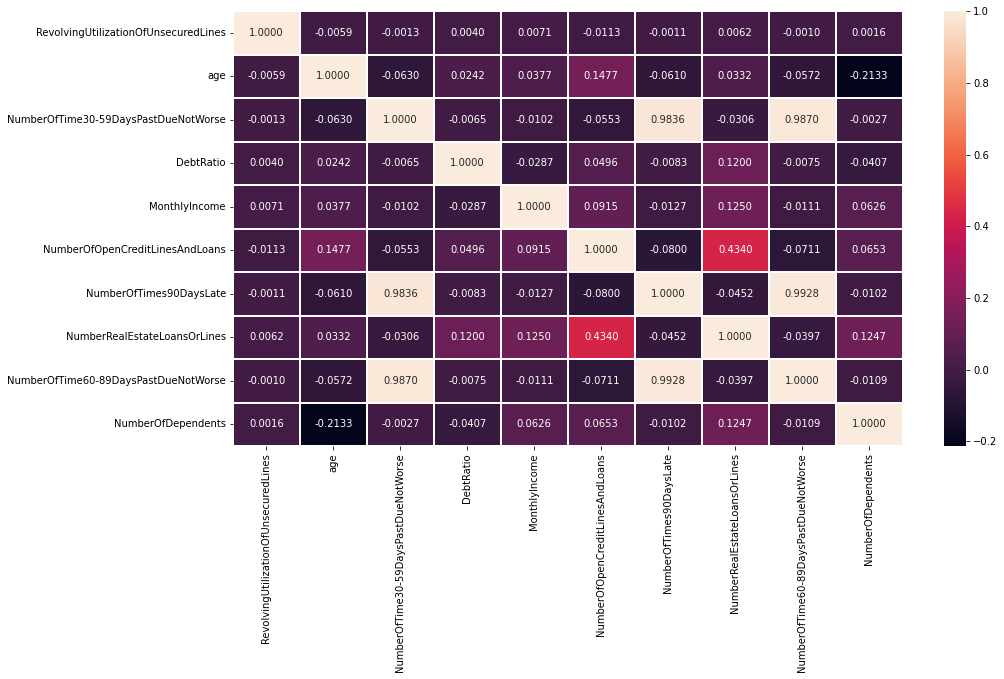

In [114]:
# Correlation between features
fig=plt.figure(figsize=(15,8))
sn.heatmap(df_train.corr(),annot = True,linewidths = .9,fmt = '.4f')

**Training Model**

In [116]:
#splitting input dataset into train and validation set
X_train, X_val, y_train, y_val = train_test_split(df_train.fillna(0),df_train_target['SeriousDlqin2yrs'].values, test_size=0.20,random_state=10, shuffle = True)

In [118]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(120000, 10)
(120000,)
(30000, 10)
(30000,)


In [120]:
# Creating Pipeline Function for model
def createpipeline(classifier,feature_selection,encoder):

  
    enc = {
        'Label': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
        'OneHot': OneHotEncoder(handle_unknown='ignore')
    }
    numeric_transformer = Pipeline([('Impt', SimpleImputer(strategy='constant')),('scaler', StandardScaler()),]) # Numerical Column Transformation.
    categorical_transformer = Pipeline([('Impt', SimpleImputer(strategy='most_frequent')),('encoder', enc[encoder]),]) # Categorical Column Transformation.  
    preprocessor = ColumnTransformer(
        transformers=[
            ("Numerical_transform", numeric_transformer, make_column_selector(dtype_include="number")),
            ("Categorical_transform", categorical_transformer, make_column_selector(dtype_exclude="number")),
        ]
    )  
    return Pipeline(steps=[('preprocessor', preprocessor)] + [('feature_select', feature_selection)] + [('classifier', classifier)])

**Test 1 : using MLP classifier**

In [122]:
classifer=MLPClassifier(hidden_layer_sizes='hidden_layer_sizes', 
                        activation = 'activation',solver='solver',
                        alpha='alpha',learning_rate='learning_rate',
                        max_iter=200)
feature_selection=RFECV( min_features_to_select='min_features_to_select', verbose =3,estimator=LinearRegression())
ecoder='Label'
pipe = createpipeline(classifer,feature_selection,ecoder)

In [123]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical_transform',
                                                  Pipeline(steps=[('Impt',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0d590762e0>),
                                                 ('Categorical_transform',
                                                  Pipeline(steps=[('Impt',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                                                  <sklearn.compose._column_transform

In [126]:
parameter_space = {
    'classifier__hidden_layer_sizes': [(10,), (100,), (1000,),(50,50,50), (50,100,50), (10,100,10)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__alpha': [0.05,0.001,0.0001,0.00001,0.00001],
    'classifier__learning_rate': ['constant','adaptive'],
    'feature_select__min_features_to_select':[1,2,3]
}

# Search for best hyperparamters
cv_strategy = StratifiedKFold(n_splits=2, shuffle=True) # Cross-validation Method
search = RandomizedSearchCV(pipe, parameter_space, n_jobs=-1, cv=cv_strategy, scoring='f1_weighted').fit(X_train, y_train)

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 10 features.
Fitting estimato

In [127]:
print('BEST PARAMS:', search.best_params_)

BEST PARAMS: {'feature_select__min_features_to_select': 1, 'classifier__solver': 'adam', 'classifier__learning_rate': 'adaptive', 'classifier__hidden_layer_sizes': (10,), 'classifier__alpha': 0.001, 'classifier__activation': 'tanh'}


In [128]:
pipe = search.best_estimator_

In [129]:
# fir the model on best hyperparameters
pipe.fit(X_train,y_train)

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 10 features.
Fitting estimato

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical_transform',
                                                  Pipeline(steps=[('Impt',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0d5900aa00>),
                                                 ('Categorical_transform',
                                                  Pipeline(steps=[('Impt',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEnc

In [130]:
# Test on Validation set
y_pred_val = pipe.predict(X_val) 
print(accuracy_score(y_val, y_pred_val))

0.9371666666666667


In [131]:
#Quantitative Metrics
report = classification_report(y_val, y_pred_val, output_dict=True)
results = pd.DataFrame(report).transpose()
results

,precision,recall,f1-score,support
0,0.945176,0.990065,0.967100,27983.000000
1,0.595930,0.203272,0.303142,2017.000000
accuracy,0.937167,0.937167,0.937167,0.937167
macro avg,0.770553,0.596669,0.635121,30000.000000
weighted avg,0.921695,0.937167,0.922460,30000.000000


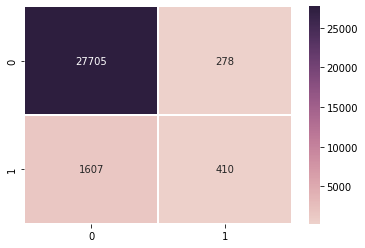

In [133]:
# Confusion Matrix
cf_matrix=confusion_matrix(y_val, y_pred_val)
sn.heatmap(cf_matrix, annot=True,fmt=".0f", cmap=sn.cubehelix_palette(as_cmap=True),linewidth=.5)

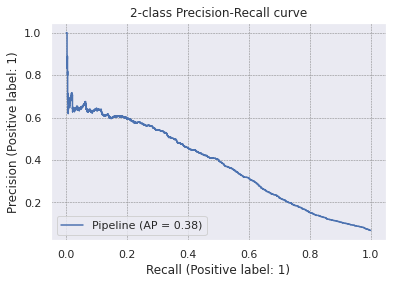

In [139]:
# Plot PRC Curve
display = PrecisionRecallDisplay.from_estimator(
    pipe, X_val, y_val
)
sn.set()
display.ax_.set_title("2-class Precision-Recall curve")
plt.grid(color='gray', linestyle='--', linewidth=0.5)

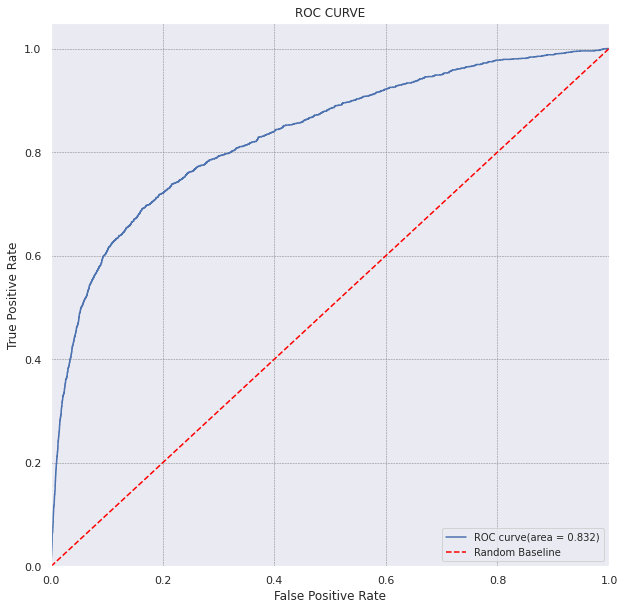

In [136]:
# Plot Roc Curve
fig = plt.figure(figsize=(10, 10))
# Get FPR, TPR and AUC
fpr, tpr, _ = roc_curve(y_val,pipe.predict_proba(X_val)[:,1].ravel())
roc_auc = auc(fpr, tpr)
sn.set()
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.legend(loc="lower right", fontsize='small')

**Test 2 : using XGBoost classifier**

In [140]:
classifer1=XGBClassifier()
feature_selection1= SelectFromModel(estimator=LinearSVC(C=0.1, penalty="l1", dual=False))
ecoder1='Label'
pipe1 = createpipeline(classifer1,feature_selection1,ecoder1)

In [141]:
pipe1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical_transform',
                                                  Pipeline(steps=[('Impt',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0d583e1c40>),
                                                 ('Categorical_transform',
                                                  Pipeline(steps=[('Impt',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEnc

In [142]:
parameter_space = {
    'classifier__max_depth': [1,2,3,4,5,6,7],
    'classifier__n_estimators' : [100,150,200,250,300,350,400],
    'classifier__learning_rate' : [0.05,0.10,0.01,0.001,0.0001],
    'classifier__gamma' : [0.0,0.1,0.2,0.3],
    'classifier__colsample_bytree' : [0.5,0.7],
    'classifier__max_depth' : [3,4,6,8]
}

# Search for best hyperparamters
cv_strategy = TimeSeriesSplit() # Cross-validation Method
search = RandomizedSearchCV(
    pipe1, parameter_space, cv=cv_strategy, scoring='f1_macro', random_state=0, verbose=1,n_iter=20,).fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to conve

In [143]:
print('BEST PARAMS:', search.best_params_)

BEST PARAMS: {'classifier__n_estimators': 300, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.05, 'classifier__gamma': 0.1, 'classifier__colsample_bytree': 0.7}


In [144]:
pipe1 = search.best_estimator_

In [145]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical_transform',
                                                  Pipeline(steps=[('Impt',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0d584fe3a0>),
                                                 ('Categorical_transform',
                                                  Pipeline(steps=[('Impt',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                                                                   OrdinalEncoder(ha

In [148]:
y_pred_val1 = pipe1.predict(X_val) 
print(accuracy_score(y_val, y_pred_val1))

0.9379


In [149]:
#Quantitative Metrics
report = classification_report(y_val, y_pred_val1, output_dict=True)
results = pd.DataFrame(report).transpose()
results

,precision,recall,f1-score,support
0,0.944793,0.991352,0.967512,27983.0000
1,0.620690,0.196331,0.298305,2017.0000
accuracy,0.937900,0.937900,0.937900,0.9379
macro avg,0.782741,0.593842,0.632909,30000.0000
weighted avg,0.923002,0.937900,0.922519,30000.0000


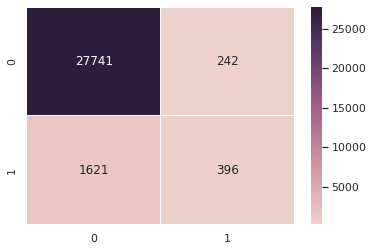

In [150]:
# Confusion Matrix
cf_matrix=confusion_matrix(y_val, y_pred_val1)
sn.heatmap(cf_matrix, annot=True,fmt=".0f", cmap=sn.cubehelix_palette(as_cmap=True),linewidth=.5)

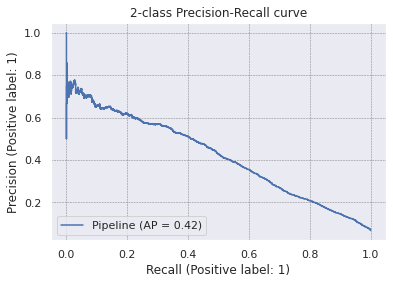

In [151]:
# Plot PRC Curve
display = PrecisionRecallDisplay.from_estimator(
    pipe1, X_val, y_val
)
sn.set()
display.ax_.set_title("2-class Precision-Recall curve")
plt.grid(color='gray', linestyle='--', linewidth=0.5)

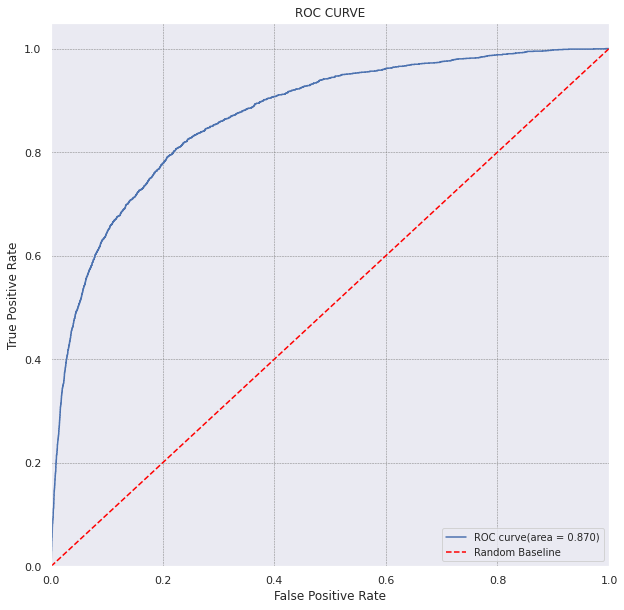

In [152]:
# Plot Roc Curve
fig = plt.figure(figsize=(10, 10))
# Get FPR, TPR and AUC
fpr, tpr, _ = roc_curve(y_val,pipe1.predict_proba(X_val)[:,1].ravel())
roc_auc = auc(fpr, tpr)
sn.set()
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.legend(loc="lower right", fontsize='small')

**Comparing both models**

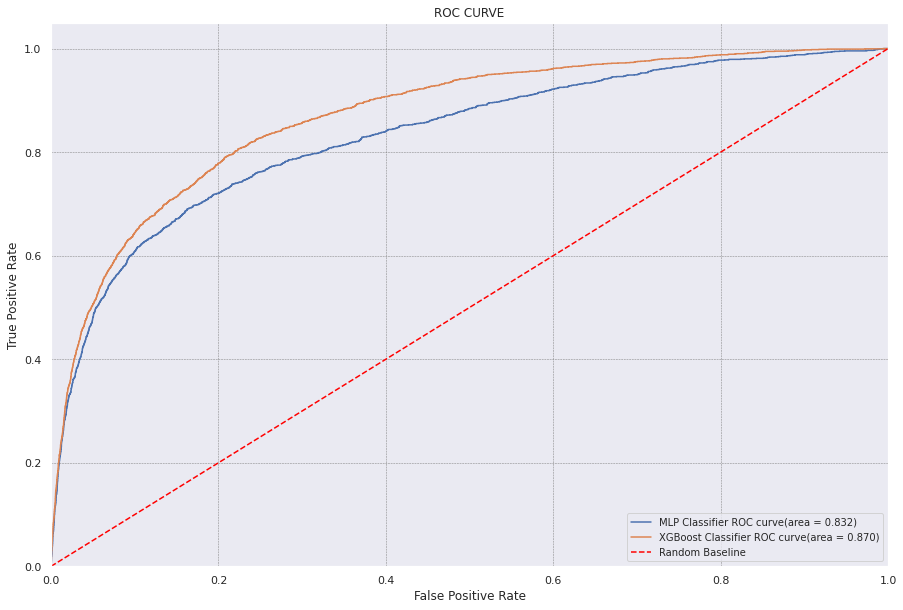

In [155]:
fig = plt.figure(figsize=(15, 10))

predictions=pipe.predict_proba(X_val)
fpr, tpr, _ = roc_curve(y_val,predictions[:,1].ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="MLP Classifier ROC curve(area = %0.3f)" % roc_auc)
predictions=pipe1.predict_proba(X_val)
fpr, tpr, _ = roc_curve(y_val,predictions[:,1].ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="XGBoost Classifier ROC curve(area = %0.3f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.legend(loc="lower right", fontsize='small') 

XGB classifier has higher accuracy and higher area under the curve for ROC hence it gives better result than MLP Classifier

**Predicting on Test Data**

In [156]:
df_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [157]:
df_test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20103
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2626
dtype: int64

In [159]:
df_test['MonthlyIncome'].fillna(df_test['MonthlyIncome'].median(),inplace = True)
df_test['NumberOfDependents'].fillna(df_test['NumberOfDependents'].mode()[0],inplace = True)
df_test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [160]:
df_test.shape

(101503, 10)

In [161]:
predictions=pipe1.predict_proba(test)
test_pred = pd.DataFrame(predictions[:,1])
test_pred.index = test_pred.index + 1
test_pred.index.name = 'Id'
test_pred = test_pred.rename(columns = {0: 'Probability'}).reset_index()
test_pred

,Id,Probability
0,1,0.072942
1,2,0.049216
2,3,0.012631
3,4,0.078984
4,5,0.094444
...,...,...
101498,101499,0.035394
101499,101500,0.351882
101500,101501,0.006105
101501,101502,0.076274


In [162]:
test_pred.to_csv('Test_Result.csv', index = False)